## 1. 라이브러리

In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings(action = 'ignore')

In [35]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [36]:
#한글
plt.rc('font', family='Malgun Gothic')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

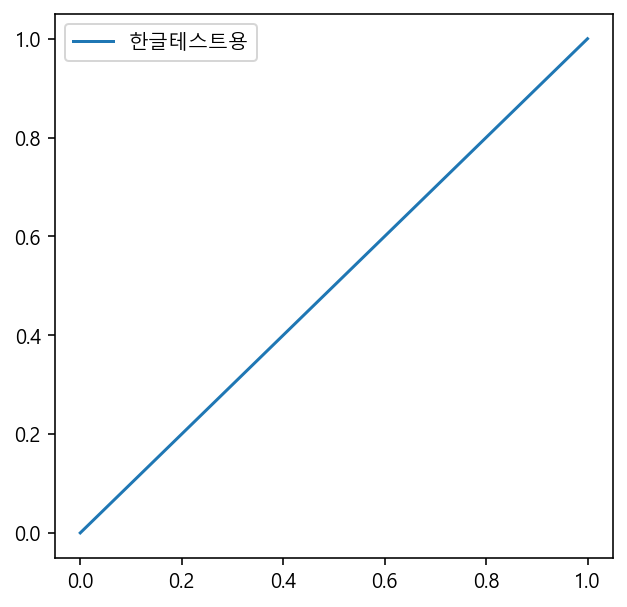

In [37]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [38]:
sub=pd.read_excel('data/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx', header=1)

In [39]:
data = pd.read_csv('data/train_data_02.csv', index_col = 0)

In [40]:
data

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,세부상품군,브랜드
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,니트/터틀넥/기모,테이트
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,니트/터틀넥/기모,테이트
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,니트/터틀넥/기모,테이트
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,니트/터틀넥/기모,테이트
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,니트/터틀넥/기모,테이트
...,...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,NaN,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 0 to 38308
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    38309 non-null  object 
 1   노출(분)   21525 non-null  float64
 2   마더코드    38309 non-null  int64  
 3   상품코드    38309 non-null  int64  
 4   상품명     38309 non-null  object 
 5   상품군     38309 non-null  object 
 6   판매단가    38309 non-null  int64  
 7   취급액     35379 non-null  float64
 8   세부상품군   37372 non-null  object 
 9   브랜드     37372 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.2+ MB


## 2. 시청률데이터 전치 및 새벽시간 데이터 처리

In [42]:
tv = sub.iloc[:-1,:-1]
tv

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
1,02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
2,02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
3,02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
4,02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1436,01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1437,01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1438,01:58,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.017,0.000,0.0,0.015,0.0,0.0,0.019,0.000


In [43]:
tv = tv.set_index('시간대')

In [44]:
tv

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [45]:
tv['2020-01-01'] = np.nan

In [46]:
# 행렬전치
tv_real = tv

tv_real_rever = np.transpose(tv_real)
tv_real_rever

시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
2019-01-01,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-01-02,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-01-03,0.0,0.000,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-01-04,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-01-05,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-12-29,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2019-12-30,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.019,0.0
2019-12-31,0.0,0.012,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0


In [47]:
# 실적 데이터와 시간대를 맞추기 위하여 새벽 00:00 ~ 01:59까지를 다음날로 이동
tv_real_rever.loc[:,'00:00':'01:59'] = tv_real_rever.loc[:,'00:00':'01:59'].shift(1)
tv_real_rever

시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
2019-01-01,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-03,0.0,0.000,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-04,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-05,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015
2019-12-29,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-30,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-31,0.0,0.012,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.000


In [48]:
tv_real_rever_fix = tv_real_rever.fillna(0)
tv_real_rever_fix

시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
2019-01-01,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.014,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-02,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-03,0.0,0.000,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-04,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-05,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015
2019-12-29,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-30,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-31,0.0,0.012,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.000


In [49]:
#새벽시간 조정 데이터
# tv_real_rever_fix.to_csv('data/tv_real_rever_fix.csv', encoding='utf-8-sig') 

In [50]:
tv_real_rever_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2019-01-01 to 2020-01-01
Columns: 1440 entries, 02:00 to 01:59
dtypes: float64(1440)
memory usage: 4.0+ MB


## Train data와 같은 형식으로 만들기

In [82]:
# tv_real_rever_fix=pd.read_csv('data/tv_real_rever_fix.csv',index_col=0)
time_stack = tv_real_rever_fix.stack().reset_index()
time_stack.columns = ['day','time','시청률']


In [83]:
time_stack.head(30)

,day,time,시청률
0,2019-01-01,02:00,0.000
1,2019-01-01,02:01,0.000
2,2019-01-01,02:02,0.000
3,2019-01-01,02:03,0.000
4,2019-01-01,02:04,0.000
5,2019-01-01,02:05,0.000
6,2019-01-01,02:06,0.000
7,2019-01-01,02:07,0.000
8,2019-01-01,02:08,0.000
9,2019-01-01,02:09,0.014


In [84]:
time_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527040 entries, 0 to 527039
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   day     527040 non-null  object 
 1   time    527040 non-null  object 
 2   시청률     527040 non-null  float64
dtypes: float64(1), object(2)
memory usage: 12.1+ MB


In [85]:
# time_stack['period'] = time_stack[['day', 'time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [86]:
time_stack["period"] = time_stack["day"].astype(str) + ' ' + time_stack["time"].astype(str)

In [87]:
time_stack

,day,time,시청률,period
0,2019-01-01,02:00,0.0,2019-01-01 02:00
1,2019-01-01,02:01,0.0,2019-01-01 02:01
2,2019-01-01,02:02,0.0,2019-01-01 02:02
3,2019-01-01,02:03,0.0,2019-01-01 02:03
4,2019-01-01,02:04,0.0,2019-01-01 02:04
...,...,...,...,...
527035,2020-01-01,01:55,0.0,2020-01-01 01:55
527036,2020-01-01,01:56,0.0,2020-01-01 01:56
527037,2020-01-01,01:57,0.0,2020-01-01 01:57
527038,2020-01-01,01:58,0.0,2020-01-01 01:58


In [88]:
time_stack = time_stack[['period','시청률']]
time_stack

,period,시청률
0,2019-01-01 02:00,0.0
1,2019-01-01 02:01,0.0
2,2019-01-01 02:02,0.0
3,2019-01-01 02:03,0.0
4,2019-01-01 02:04,0.0
...,...,...
527035,2020-01-01 01:55,0.0
527036,2020-01-01 01:56,0.0
527037,2020-01-01 01:57,0.0
527038,2020-01-01 01:58,0.0


In [89]:
time_stack.index = pd.to_datetime(time_stack.period)
time_period = time_stack.drop('period', axis=1)
time_period

,시청률
period,
2019-01-01 02:00:00,0.0
2019-01-01 02:01:00,0.0
2019-01-01 02:02:00,0.0
2019-01-01 02:03:00,0.0
2019-01-01 02:04:00,0.0
...,...
2020-01-01 01:55:00,0.0
2020-01-01 01:56:00,0.0
2020-01-01 01:57:00,0.0


In [90]:
time_rep = data.loc[data['노출(분)'].notnull(), ['방송일시','노출(분)']].reset_index()
time_rep = time_rep.drop('index', axis=1)
time_rep

,방송일시,노출(분)
0,2019-01-01 06:00:00,20.000000
1,2019-01-01 06:20:00,20.000000
2,2019-01-01 06:40:00,20.000000
3,2019-01-01 07:00:00,20.000000
4,2019-01-01 07:20:00,20.000000
...,...,...
21520,2020-01-01 00:20:00,20.000000
21521,2020-01-01 00:40:00,20.000000
21522,2020-01-01 01:00:00,20.000000
21523,2020-01-01 01:20:00,20.000000


In [91]:
time_rep.방송일시 = pd.to_datetime(time_rep.방송일시)

In [92]:
import datetime
time_rep.iloc[0,0] - datetime.timedelta(minutes=1)

Timestamp('2019-01-01 05:59:00')

In [93]:
time_period.loc['2019-01-02 10:40:00':'2019-01-02 11:00:00']

,시청률
period,
2019-01-02 10:40:00,0.017
2019-01-02 10:41:00,0.017
2019-01-02 10:42:00,0.017
2019-01-02 10:43:00,0.017
2019-01-02 10:44:00,0.017
2019-01-02 10:45:00,0.017
2019-01-02 10:46:00,0.017
2019-01-02 10:47:00,0.000
2019-01-02 10:48:00,0.000


In [64]:
time_rep.iloc[21524,1]

17.166666666666668

In [30]:
round(time_rep.iloc[21524,1]) == time_rep.iloc[21524,1]

False

In [65]:
time_rep.iloc[21524,1]

17.166666666666668

In [110]:
import datetime

tv_rates = [] 
sdd = []
for i in range(len(time_rep)): 
    if round(time_rep.iloc[i,1]) == time_rep.iloc[i,1]: #노출시간이 소수점이 아니면 마지막에서 1을 뺌 ex) 06:20:00 에서 20.0분이라면 06:39:00 까지만 포함
        part = time_period.loc[time_rep.iloc[i,0]:time_rep.iloc[i,0] + datetime.timedelta(minutes=round(time_rep.iloc[i,1])) - datetime.timedelta(minutes=1)]
    else: #노출시간 소수점 ex) 06:20:00 에서 20.2분이라면 06:40:00 까지 포함
        part = time_period.loc[time_rep.iloc[i,0]:time_rep.iloc[i,0] + datetime.timedelta(minutes=round(time_rep.iloc[i,1]))]
    
    tv_rates.append(part['시청률'].mean()) 

In [111]:
len(tv_rates)

21525

In [112]:
time_rep['시청률'] = tv_rates
time_rep = time_rep[['방송일시','시청률']]

In [113]:
time_rep['시청률'].value_counts()

0.000000    6868
0.000700     241
0.000600     234
0.000800     226
0.000750     189
            ... 
0.039450       1
0.022800       1
0.001935       1
0.024250       1
0.003267       1
Name: 시청률, Length: 2692, dtype: int64

In [114]:
time_rep

,방송일시,시청률
0,2019-01-01 06:00:00,0.0000
1,2019-01-01 06:20:00,0.0000
2,2019-01-01 06:40:00,0.0000
3,2019-01-01 07:00:00,0.0000
4,2019-01-01 07:20:00,0.0000
...,...,...
21520,2020-01-01 00:20:00,0.0024
21521,2020-01-01 00:40:00,0.0000
21522,2020-01-01 01:00:00,0.0000
21523,2020-01-01 01:20:00,0.0000


## Train data에 시청률데이터 합치기

In [115]:
data['방송일시'] = pd.to_datetime(data['방송일시'])

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 0 to 38308
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     35379 non-null  float64       
 8   세부상품군   37372 non-null  object        
 9   브랜드     37372 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 3.2+ MB


In [117]:
time_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    21525 non-null  datetime64[ns]
 1   시청률     21525 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.5 KB


In [118]:
time_rep['방송일시'] = pd.to_datetime(time_rep['방송일시'])

In [119]:
# time_rep['방송일시'] = time_rep['방송일시'].astype('object')
# data['방송일시'] = data['방송일시'].astype('object')


In [120]:
final_data = pd.merge(data, time_rep, on = '방송일시',how='inner')

In [121]:
final_data.head(30)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,세부상품군,브랜드,시청률
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,니트/터틀넥/기모,테이트,0.000000
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,니트/터틀넥/기모,테이트,0.000000
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,니트/터틀넥/기모,테이트,0.000000
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,니트/터틀넥/기모,테이트,0.000000
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,니트/터틀넥/기모,테이트,0.000000
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,니트/터틀넥/기모,테이트,0.000000
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,브라/팬티,오모떼,0.000000
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,브라/팬티,오모떼,0.000000
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,브라/팬티,오모떼,0.000000
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,겨울팬츠,CERINI by PAT,0.000000


In [122]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 0 to 38308
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     35379 non-null  float64       
 8   세부상품군   37372 non-null  object        
 9   브랜드     37372 non-null  object        
 10  시청률     38309 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 3.5+ MB


In [88]:
# filtered_df = final_data[final_data['시청률'].notnull()].reset_index(drop=True)

In [93]:
final_data.to_csv('data/train_data_03.csv', encoding='utf-8-sig')